<a href="https://colab.research.google.com/github/AftabUdaipurwala/Deeplearning/blob/main/Dropout_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import pandas as pd
import numpy as np
from sklearn import linear_model
from google.colab import drive
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow import keras

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
!ls '/content/drive/MyDrive/py-master/DeepLearningML/13_dropout_layer'

dropout_regularization_ann.ipynb  sonar_dataset.csv


In [31]:
df = pd.read_csv('/content/drive/MyDrive/py-master/DeepLearningML/13_dropout_layer/sonar_dataset.csv', header =None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


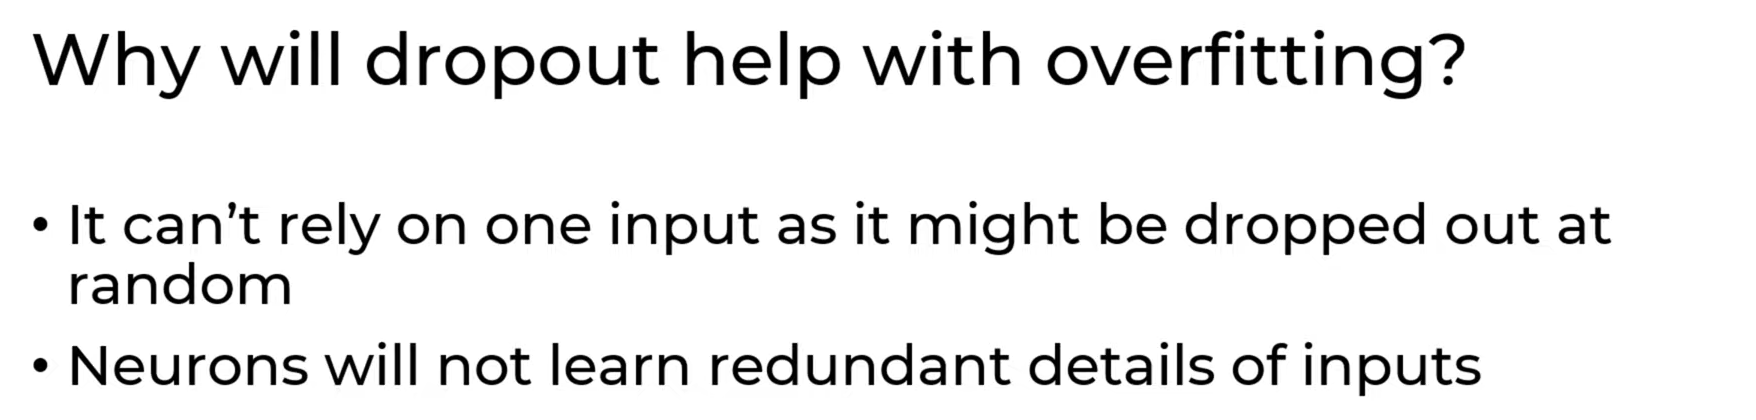

In [35]:
df.shape

(208, 61)

In [32]:
df.columns = np.arange(1,62)
arr =  np.arange(1,62)
for i in arr:
  df.rename(columns={i: str(i)}, inplace=True)
  
df.rename(columns={'61':'Class'}, inplace=True)


In [33]:
df.head(2)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.31,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.00,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.014,0.0049,0.0052,0.0044,R


In [34]:
df.isna().sum()

1        0
2        0
3        0
4        0
5        0
        ..
57       0
58       0
59       0
60       0
Class    0
Length: 61, dtype: int64

In [36]:
df.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37',
       '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       'Class'],
      dtype='object')

In [37]:
df['Class'].value_counts()

M    111
R     97
Name: Class, dtype: int64

In [40]:
x = df.drop('Class', axis=1)
y = df.Class
y = pd.get_dummies(y, drop_first=True)
y.head(5)

,R
0,1
1,1
2,1
3,1
4,1


In [41]:
y.value_counts()

R
0    111
1     97
dtype: int64

In [44]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,random_state=42,test_size=0.25)
xtrain.shape

(156, 60)

In [45]:
import tensorflow as tf
from tensorflow import keras
# for hidden layer most popular activation function is relu

In [46]:
model = keras.Sequential([
                          keras.layers.Dense(60, input_dim=60, activation='relu'),
                          keras.layers.Dense(30, activation='relu'),
                          keras.layers.Dense(15, activation='relu'),
                          keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss= 'binary_crossentropy', optimizer='adam', metrics =['accuracy'])
model.fit(xtrain,ytrain, epochs=100, batch_size=8)

Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 0.7221 - accuracy: 0.5192
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.4936
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.5449
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6693 - accuracy: 0.6346
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6503 - accuracy: 0.6346
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6256 - accuracy: 0.6667
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6033 - accuracy: 0.7115
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5617 - accuracy: 0.7756
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5547 - accuracy: 0.7308
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4976 - accuracy: 0.7821
Epoch 11/

In [47]:
model.evaluate(xtest,ytest)

2/2 [==============================] - 0s 6ms/step - loss: 0.3990 - accuracy: 0.8846


[0.39900296926498413, 0.8846153616905212]

In [49]:
ypred= np.round(model.predict(xtest).reshape(-1))

In [51]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        30
           1       0.83      0.91      0.87        22

    accuracy                           0.88        52
   macro avg       0.88      0.89      0.88        52
weighted avg       0.89      0.88      0.89        52



# ***Try model with Drop out regularization***

In [52]:
model = keras.Sequential([
                          keras.layers.Dense(60, input_dim=60, activation='relu'),
                          keras.layers.Dropout(0.5),
                          keras.layers.Dense(30, activation='relu'),
                          keras.layers.Dropout(0.5),
                          keras.layers.Dense(15, activation='relu'),
                          keras.layers.Dropout(0.5),
                          keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss= 'binary_crossentropy', optimizer='adam', metrics =['accuracy'])
model.fit(xtrain,ytrain, epochs=100, batch_size=8)

Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 0.7768 - accuracy: 0.4808
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7181 - accuracy: 0.4872
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7020 - accuracy: 0.5192
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.5256
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.5128
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6960 - accuracy: 0.4808
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6796 - accuracy: 0.5513
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6742 - accuracy: 0.5897
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6683 - accuracy: 0.5897
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.5641
Epoch 11/

In [53]:
model.evaluate(xtest,ytest)

2/2 [==============================] - 0s 7ms/step - loss: 0.2550 - accuracy: 0.9231


[0.2550395727157593, 0.9230769276618958]

In [54]:
ypred= np.round(model.predict(xtest).reshape(-1))

In [55]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        30
           1       0.91      0.91      0.91        22

    accuracy                           0.92        52
   macro avg       0.92      0.92      0.92        52
weighted avg       0.92      0.92      0.92        52



# ***drop out regularization is mostly used in the computer vision problems where overfitting is happening***